# IMPORTANT: This will run on Labrador, not on tolman

# NOTES:
* See notes form file 02 (run_group_ICA) (just look at the most updated version of it). Some notes are VERY relevant.

* Look at NEXT: note at the bottom of this page.

* pip install git+https://git.fmrib.ox.ac.uk/fsl/fslnets.git
Needed to be run to use this


# Import stuff + params

In [1]:
from fsl import nets
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# need to set up to run fsl.
os.environ['FSLDIR'] = '/export/home/ranigera/fsl'
os.environ['PATH'] += ':/export/home/ranigera/fsl/bin'

group_ICA_path = '/export/home/ranigera/IDCH-rsfMRI/data/group_ICA'

whole_network_path = '/export/home/ranigera/IDCH-rsfMRI/data/whole_networks'

# n_ICs = 50 # number of independent components

# R01 to IDCH mapping:
mapping_R01_to_IDCH = {'222': '101', '183': '102', '216': '103', '192': '104', '251': '105', '206': '106', '180': '107', '184': '108', '169': '109', '207': '110',
                       '159': '111', '115': '112', '114': '113', '232': '114', '173': '115', '171': '117', '215': '118', '265': '119', '177': '120', '269': '121',
                       '261': '122'}

mapping_R01_to_IDCH_more = {'094': '123', '253': '124', '247': '125', '233': '126', '229': '127', '246': '128', '214': '129', '205': '130', '234': '131', '230': '132',
                                        '218': '133', '213': '134', '237': '135', '129': '136', '126': '137', '228': '138', '141': '139', '197': '140', '202': '141', '196': '142',
                                        '181': '143', '189': '144', '142': '145', '176': '148', '163': '149', '099': '152', '052': '153', '063': '154', '082': '155'}

# concatenate the two mappings:
mapping_R01_to_IDCH.update(mapping_R01_to_IDCH_more)

main_behav_file = '/export/home/ranigera/IDCH-rsfMRI/data/behav_data/merged_behav_data.csv'

In [2]:
n_ICs=50 # number of independent components
# run slices_summary:
# check if exists:
if not os.path.exists(f'{group_ICA_path}/groupICA{n_ICs}.sum'):
    os.system(f'slices_summary {group_ICA_path}/groupICA{n_ICs}/melodic_IC 4 $FSLDIR/data/standard/MNI152_T1_2mm {group_ICA_path}/groupICA{n_ICs}.sum -1')


## Copy the time series to a dedicated folder and assign the right subject (IDCH) number

In [3]:
n_ICs=50 # number of independent components

by_IDCH_sub_ID_ts_path = os.path.join(whole_network_path, f'ICs{n_ICs}_ts_by_IDCH_sub_ID')
if not os.path.exists(by_IDCH_sub_ID_ts_path):
    os.makedirs(by_IDCH_sub_ID_ts_path)

dual_regressed_path = os.path.join(f'{group_ICA_path}/groupICA{n_ICs}.dr')
file_list = sorted(glob.glob(f'{dual_regressed_path}/*stage1*.txt'))

matching_IDCH_sub_list = sorted(mapping_R01_to_IDCH.values())

for i in range(0, len(file_list)):
    os.system(f'cp {file_list[i]} {by_IDCH_sub_ID_ts_path}/dr_stage1_{matching_IDCH_sub_list[i]}.txt')

# Explore all data (across all subjects)

In [4]:
ts = nets.load(f'{by_IDCH_sub_ID_ts_path}', 0.70, varnorm=0, nruns=1, thumbnaildir=f'{group_ICA_path}/groupICA{n_ICs}.sum')

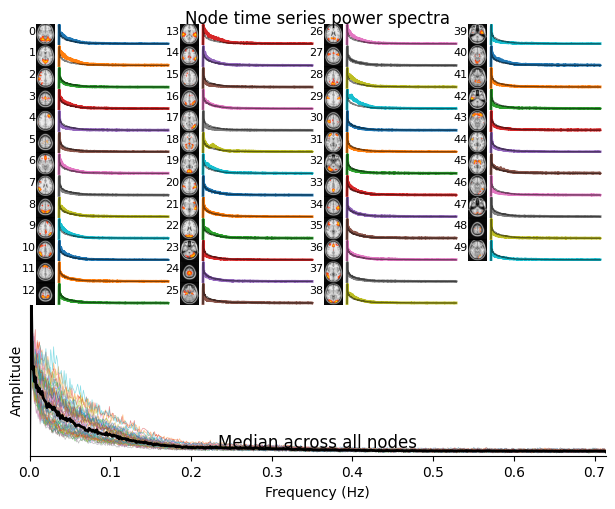

In [5]:
nets.plot_spectra(ts);

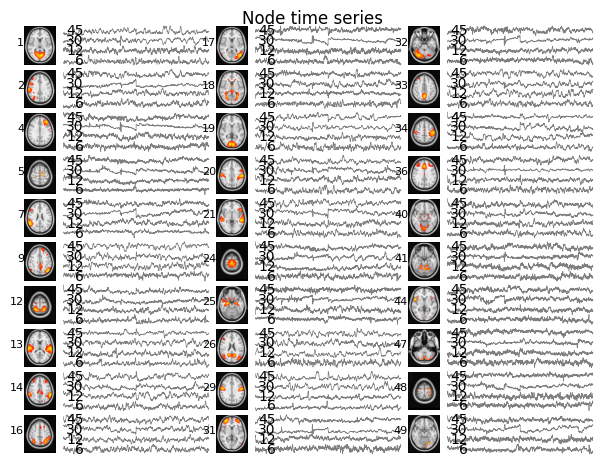

In [6]:
nets.plot_timeseries(ts)
plt.show()


In [7]:
# If I have bad components that I want to clean up.
#nets.clean(ts, goodnodes, True)


In [8]:
# # plot time series for each component (each subject is a line):
# for i in range(ts.ts[0].shape[2]):
#     for j in range(len(ts.ts)):
#         plt.plot(ts.ts[j][:,:,i][0])
#     plt.title(f'IC {i}')
#     plt.show()


In [7]:
Fnetmats = nets.netmats(ts, 'corr',   True)
Pnetmats = nets.netmats(ts, 'ridgep', True, 0.1) # partial correlations with regularization

In [8]:
Fnetmats.shape
# subjects and components x components

(50, 2500)

In [9]:
Znet_F, Mnet_F = nets.groupmean(ts, Fnetmats, False)
# NOTE: Seeing this 'invalid value encountered in true_divide' should be fine according to their tutorial (fsl's)


invalid value encountered in divide


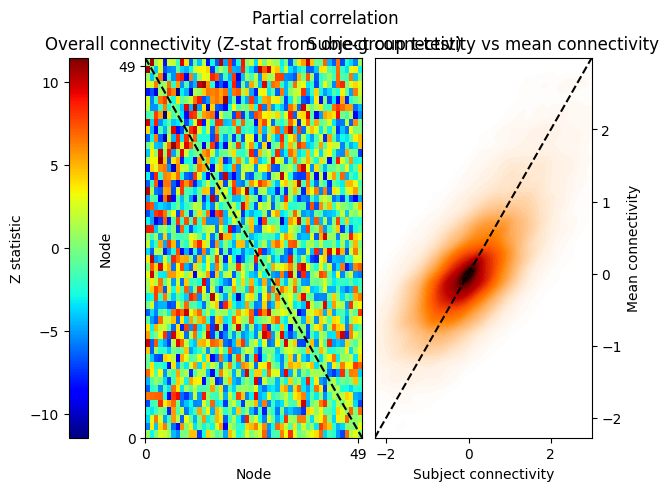

In [12]:
Znet_P, Mnet_P = nets.groupmean(ts, Pnetmats, True, 'Partial correlation') # "saves out both the simple average of netmats across all subjects (Mnet) and the results of a simple one-group t-test (against zero) across subjects as Z values (Znet)."
# NOTE: Seeing this 'invalid value encountered in true_divide' should be fine according to their tutorial (fsl's)
# NOTE: I think the left is the result of one sample t-test at each edge. not the average partial correlation (which is in Mnet_P)

([18,
  5,
  4,
  20,
  16,
  14,
  36,
  45,
  34,
  24,
  3,
  12,
  30,
  29,
  13,
  27,
  8,
  42,
  25,
  44,
  7,
  37,
  2,
  28,
  33,
  26,
  6,
  11,
  9,
  10,
  31,
  15,
  43,
  39,
  21,
  35,
  22,
  0,
  1,
  19,
  17,
  23,
  41,
  32,
  38,
  48,
  40,
  49,
  46,
  47],
 array([[0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 2.00000000e+00],
        [5.00000000e+01, 1.90000000e+01, 0.00000000e+00, 3.00000000e+00],
        [3.00000000e+00, 1.20000000e+01, 0.00000000e+00, 2.00000000e+00],
        [6.00000000e+00, 1.10000000e+01, 0.00000000e+00, 2.00000000e+00],
        [2.10000000e+01, 3.50000000e+01, 0.00000000e+00, 2.00000000e+00],
        [2.20000000e+01, 5.10000000e+01, 0.00000000e+00, 4.00000000e+00],
        [3.30000000e+01, 2.60000000e+01, 5.15187956e-03, 2.00000000e+00],
        [5.20000000e+01, 3.00000000e+01, 8.64709989e-03, 3.00000000e+00],
        [2.90000000e+01, 1.30000000e+01, 1.79339190e-02, 2.00000000e+00],
        [2.00000000e+01, 1.60000000e+01, 2.

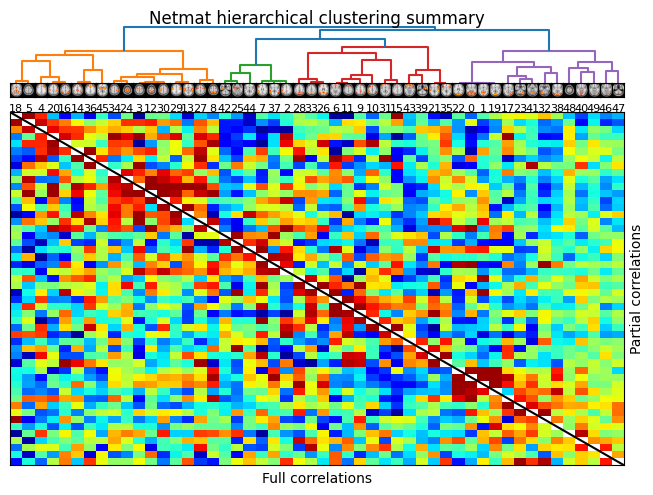

In [13]:
nets.plot_hierarchy(ts, Znet_F, Znet_P, 'Full correlations', 'Partial correlations')
# NOTE: full correlation drives the clustering, partial correlation just shown for comparison.

# Classifying based on the whole network

## Get behavior data

In [10]:
# load the behavior data:
main_behav_data = pd.read_csv(main_behav_file)
# change subID to int:
main_behav_data['subID'] = main_behav_data['subID'].astype(int)



# main_behav_data['any_test_DTH_slips'] = (main_behav_data['at_least_one_response_test']>0).astype(int)
# main_behav_data['any_combined_DTH_slips'] = (main_behav_data['at_least_one_response_combined']>0).astype(int)
# # now binarize for meanVal_relativeDiff_deval_SQRT:
# main_behav_data['any_App_slips'] = (main_behav_data['meanVal_relativeDiff_deval_SQRT']<1).astype(int)

# # New ones:
# main_behav_data['above_median_App_slips'] = (main_behav_data['meanVal_relativeDiff_deval_SQRT']<main_behav_data['meanVal_relativeDiff_deval_SQRT'].median()).astype(int)
# main_behav_data['above_median_SRM'] = (main_behav_data['SRM_score']>main_behav_data['SRM_score'].median()).astype(int)
# main_behav_data['above_median_std_diary'] = (main_behav_data['std_diary']>main_behav_data['std_diary'].median()).astype(int)
# main_behav_data['above_median_normed_std_diary'] = (main_behav_data['normed_std_diary']>main_behav_data['normed_std_diary'].median()).astype(int)
# main_behav_data['above_median_routine_mean'] = (main_behav_data['routine_mean']>main_behav_data['routine_mean'].median()).astype(int)


# For binary variables based on thresholds, use .where() or handle NaNs explicitly
main_behav_data['any_test_DTH_slips'] = (main_behav_data['at_least_one_response_test'] > 0).astype(float)
main_behav_data.loc[main_behav_data['at_least_one_response_test'].isna(), 'any_test_DTH_slips'] = np.nan

main_behav_data['any_combined_DTH_slips'] = (main_behav_data['at_least_one_response_combined'] > 0).astype(float)
main_behav_data.loc[main_behav_data['at_least_one_response_combined'].isna(), 'any_combined_DTH_slips'] = np.nan

main_behav_data['any_App_slips'] = (main_behav_data['meanVal_relativeDiff_deval_SQRT'] < 1).astype(float)
main_behav_data.loc[main_behav_data['meanVal_relativeDiff_deval_SQRT'].isna(), 'any_App_slips'] = np.nan

# New ones - using median splits
main_behav_data['above_median_App_slips'] = (main_behav_data['meanVal_relativeDiff_deval_SQRT'] <= main_behav_data['meanVal_relativeDiff_deval_SQRT'].median()).astype(float)
main_behav_data.loc[main_behav_data['meanVal_relativeDiff_deval_SQRT'].isna(), 'above_median_App_slips'] = np.nan

main_behav_data['above_median_SRM'] = (main_behav_data['SRM_score'] >= main_behav_data['SRM_score'].median()).astype(float)
main_behav_data.loc[main_behav_data['SRM_score'].isna(), 'above_median_SRM'] = np.nan

main_behav_data['above_median_std_diary'] = (main_behav_data['std_diary'] <= main_behav_data['std_diary'].median()).astype(float)
main_behav_data.loc[main_behav_data['std_diary'].isna(), 'above_median_std_diary'] = np.nan

main_behav_data['above_median_normed_std_diary'] = (main_behav_data['normed_std_diary'] <= main_behav_data['normed_std_diary'].median()).astype(float)
main_behav_data.loc[main_behav_data['normed_std_diary'].isna(), 'above_median_normed_std_diary'] = np.nan

main_behav_data['above_median_routine_mean'] = (main_behav_data['routine_mean'] >= main_behav_data['routine_mean'].median()).astype(float)
main_behav_data.loc[main_behav_data['routine_mean'].isna(), 'above_median_routine_mean'] = np.nan


# behav_vars_if_interest = ['any_test_DTH_slips', 'any_combined_DTH_slips', 'any_App_slips']
behav_vars_if_interest = ['any_test_DTH_slips', 'any_combined_DTH_slips', 'any_App_slips', 'above_median_App_slips', 'above_median_SRM', 'above_median_std_diary', 'above_median_routine_mean']
behav_vars_if_interest = ['any_test_DTH_slips', 'any_combined_DTH_slips', 'above_median_App_slips', 'above_median_SRM', 'above_median_std_diary', 'above_median_routine_mean', 'above_median_normed_std_diary']
behav_vars_if_interest = ['any_combined_DTH_slips', 'above_median_App_slips', 'above_median_SRM', 'above_median_std_diary', 'above_median_routine_mean', 'above_median_normed_std_diary']

main_behav_data

# I want a sumary of the majority class for each binary variable:
for var in behav_vars_if_interest:
    print(f'Variable: {var}')
    print(main_behav_data[var].value_counts())
    # proportion of the majority class (ignore nans)
    majority_class_count = main_behav_data[var].value_counts().max()
    total_count = main_behav_data[var].count()  # count() ignores NaNs
    proportion_majority = majority_class_count / total_count
    print(f'Proportion of majority class: {proportion_majority:.2f}\n')


Variable: any_combined_DTH_slips
any_combined_DTH_slips
0.0    25
1.0    21
Name: count, dtype: int64
Proportion of majority class: 0.54

Variable: above_median_App_slips
above_median_App_slips
0.0    23
1.0    23
Name: count, dtype: int64
Proportion of majority class: 0.50

Variable: above_median_SRM
above_median_SRM
1.0    23
0.0    22
Name: count, dtype: int64
Proportion of majority class: 0.51

Variable: above_median_std_diary
above_median_std_diary
1.0    23
0.0    22
Name: count, dtype: int64
Proportion of majority class: 0.51

Variable: above_median_routine_mean
above_median_routine_mean
1.0    24
0.0    23
Name: count, dtype: int64
Proportion of majority class: 0.51

Variable: above_median_normed_std_diary
above_median_normed_std_diary
1.0    23
0.0    22
Name: count, dtype: int64
Proportion of majority class: 0.51



# NOTE!
Below is the FSL function for classify (the nets.classify)
1) The last 4 lines are actually wrong in  my (and chatGPT's) understanding because it tries to predict all the data based on the model from the last iteration of the leave one out cross validation whichi does not make sense.
2) In any case, the important score is the "Accuracy during training:..." part. This is the crossvalidation result.
3) **>>Cacelled due to deciding to standardize and concatenate<<** I created the classify_when_multiple_sub_session to not include any subject data in the training when it is the "one out" in the cross validation. So effectively it is like leave two out (by the same subject) for each round
4) And I also created my own version function of classify (doing the same thing, but I added some stuff for convenience and removed these 4 last lines).

In [36]:
behav_vars_if_interest = ['any_test_DTH_slips', 'any_combined_DTH_slips', 'any_App_slips']
behav_vars_if_interest = ['any_test_DTH_slips', 'any_combined_DTH_slips', 'any_App_slips', 'above_median_App_slips', 'above_median_SRM', 'above_median_std_diary', 'above_median_routine_mean', 'above_median_normed_std_diary']
behav_vars_if_interest = ['any_test_DTH_slips', 'any_combined_DTH_slips', 'above_median_App_slips', 'above_median_SRM', 'above_median_std_diary', 'above_median_routine_mean', 'above_median_normed_std_diary']
behav_vars_if_interest = ['any_combined_DTH_slips', 'above_median_App_slips', 'above_median_SRM', 'above_median_std_diary', 'above_median_routine_mean', 'above_median_normed_std_diary']

#!/usr/bin/env python
#
# classify.py - Train a classifier on netmats to diffentiate groups.

# Author: Paul McCarthy <pauldmccarthy@gmail.com>
#

import warnings

import numpy                          as     np
from   sklearn.pipeline               import Pipeline
from   sklearn.preprocessing          import StandardScaler
from   sklearn.discriminant_analysis  import QuadraticDiscriminantAnalysis
from   sklearn.model_selection        import GroupKFold
from   sklearn.model_selection        import LeaveOneOut
from sklearn.decomposition import PCA


def classify(netmats, groups, classifier=None, print_folds=True, print_only_when_better_than_majority_acc = True):
    """Train a machine-learning classifier to differentiate groups based on
    netmat edge strengths.

    netmats:    (runs, edges) array containing per-subject netmats.
    groups:     Number of subjects in each group
    classifier: scikit-learn classifier object. The default is to use a
                QuadraticDiscriminantAnalysis classifier.
    """

    if classifier is None:
        classifier = QuadraticDiscriminantAnalysis(store_covariance=True)

    labels = np.zeros(netmats.shape[0], dtype=int)

    for i, group in enumerate(groups):
        start             = int(np.sum(groups[:i]))
        end               = start + group
        labels[start:end] = i

    pipe = Pipeline([('preproc', StandardScaler()),
                    ('pca', PCA(n_components=0.80)),
                    ('fit',     classifier)])

    loo = LeaveOneOut()

    predictions = np.zeros(labels.shape, dtype=int)
    for fold, (train, test) in enumerate(loo.split(netmats)):

        test_label   =  labels[test[0]]
        train_labels = [labels[i] for i in train]

        # Suppress this warning:
        #   sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
        with warnings.catch_warnings():
            warnings.simplefilter('ignore')
            pipe.fit(netmats[train], train_labels)
            result = pipe.predict(netmats[test])[0]

        predictions[fold] = result

        if print_folds:
            print(f'Training fold {fold+1:2d} label: {test_label}, prediction: {result}')

    correct  = (labels == predictions).sum()
    accuracy = correct / len(labels)
    
    majority_class_acc = max(np.bincount(labels)) / sum(np.bincount(labels))
    if print_only_when_better_than_majority_acc and accuracy <= majority_class_acc:
        return
    print(f'-------------------------------------- >  Accuracy during cross-validation: {100 * accuracy:0.2f}% [majority class accuracy: {100 * majority_class_acc:0.2f}%]')

    # predictions = pipe.predict(netmats)
    # correct     = (labels == predictions).sum()
    # accuracy    = correct / len(labels)
    # print(f'Accuracy on input data:   {100 * accuracy:0.2f}%')

def prepare_for_classification(main_behav_data ,behav_var, n_ICs=20):

    # get the data with subID and the behavior variable (and remove NaNs):
    behav_data = main_behav_data[['subID', behav_var]].dropna().reset_index(drop=True)
    # re-arange data to have all 1 in a row and all 0 in a row:
    behav_data = behav_data.sort_values(by=[behav_var,'subID'], ascending=[True, True]).reset_index(drop=True)
    n_0s = int((behav_data[behav_var] == 0).sum()) # Goal-directed
    n_1s = int((behav_data[behav_var] == 1).sum()) # Habitual
    # print(f'{behav_var}: n_0s={n_0s}, n_1s={n_1s}, total={n_0s+n_1s}')

    # nruns = 1 if concatenate_sub_runs else 2
    nruns = 1
    ## Load as the relevant data as a ts object:
    by_IDCH_sub_ID_ts_path = os.path.join(whole_network_path, f'ICs{n_ICs}_ts_by_IDCH_sub_ID')
    relevant_files = [f'{by_IDCH_sub_ID_ts_path}/dr_stage1_{subj}.txt' for subj in behav_data.subID]
    ts = nets.load(relevant_files, 0.70, varnorm=0, nruns=nruns, thumbnaildir=f'{group_ICA_path}/groupICA{n_ICs}.sum')
    Fnetmats = nets.netmats(ts, 'corr',   True)
    # print (Fnetmats.shape)
    # Pnetmats = nets.netmats(ts, 'ridgep', True, 0.1) # partial correlations with regularization
    Pnetmats = []

    return behav_data, ts, Fnetmats, Pnetmats, n_0s, n_1s


def run_classification_for_behav_vars(behav_vars_of_interest, main_behav_data, classifier=None, n_ICs=20, print_folds=False):
    print (f'\n>>>>>>>>>>>>>>>>>> Classifier: {classifier} <<<<<<<<<<<<<<<<<<')
    for behav_var in behav_vars_of_interest:
        # behav_data, ts, Fnetmats, Pnetmats, n_0s, n_1s = prepare_for_classification(main_behav_data, behav_var, n_ICs=n_ICs)
        behav_data, ts_completely_concat, Fnetmats_completely_concat, Pnetmats_completely_concat, n_0s, n_1s = prepare_for_classification(main_behav_data, behav_var, n_ICs=n_ICs)
        print(f'---------------------------------   {behav_var}   ---------------------------------')
        # print(f'>>> Partial corr (regular, leave one time series out, include all others, including the participants)')
        # classify(Pnetmats, (n_0s*2, n_1s*2), classifier=classifier, print_folds=print_folds)
        # print(f'>>> Full corr (regular, leave one time series out, include all others, including the participants)')
        # classify(Fnetmats, (n_0s*2, n_1s*2), classifier=classifier, print_folds=print_folds)
        # print(f'>>> Partial corr (time series per subject completely concatenated)')
        # classify(Pnetmats_completely_concat, (n_0s, n_1s), classifier=classifier, print_folds=print_folds)
        print(f'>>> Full corr (time series per subject completely concatenated)')
        classify(Fnetmats_completely_concat, (n_0s, n_1s), classifier=classifier, print_folds=print_folds)


In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier # Multi layer perceptron
from sklearn.tree import DecisionTreeClassifier

run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=QuadraticDiscriminantAnalysis(), n_ICs=50, print_folds=False) # DEFAULT is QuadraticDiscriminantAnalysis, so without this argument we'll get the same result
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=LinearDiscriminantAnalysis(), n_ICs=50, print_folds=False) # DEFAULT is QuadraticDiscriminantAnalysis, so without this argument we'll get the same result
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=RandomForestClassifier(), n_ICs=50, print_folds=False)
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=SVC(), n_ICs=50, print_folds=False)
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=SVC(kernel='linear'), n_ICs=50, print_folds=False)
# run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=SVC(kernel='poly'), n_ICs=50, print_folds=False)
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=SVC(kernel='sigmoid'), n_ICs=50, print_folds=False)
# run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=LogisticRegression(), n_ICs=50, print_folds=False)
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=GradientBoostingClassifier(), n_ICs=50, print_folds=False)
# run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=KNeighborsClassifier(n_neighbors=3), n_ICs=50, print_folds=False)
# run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=GaussianNB(), n_ICs=50, print_folds=False)
# run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=BernoulliNB(), n_ICs=50, print_folds=False)
# run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=AdaBoostClassifier(n_estimators=50), n_ICs=50, print_folds=False)
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'), n_ICs=50, print_folds=False)
# run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=MLPClassifier(hidden_layer_sizes=(100,), max_iter=300), n_ICs=50, print_folds=False) # Neuroal network
# run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=DecisionTreeClassifier(), n_ICs=50, print_folds=False)
# Add L1 and L2 and ElasticNet regularization to LogisticRegression:
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=LogisticRegression(penalty='l1', solver='saga'), n_ICs=50, print_folds=False)
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=LogisticRegression(penalty='l2'), n_ICs=50, print_folds=False)
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5), n_ICs=50, print_folds=False)



>>>>>>>>>>>>>>>>>> Classifier: QuadraticDiscriminantAnalysis() <<<<<<<<<<<<<<<<<<
any_combined_DTH_slips: n_0s=25, n_1s=21, total=46
---------------------------------   any_combined_DTH_slips   ---------------------------------
>>> Full corr (time series per subject completely concatenated)
above_median_App_slips: n_0s=23, n_1s=23, total=46
---------------------------------   above_median_App_slips   ---------------------------------
>>> Full corr (time series per subject completely concatenated)
-------------------------------------- >  Accuracy during cross-validation: 67.39% [majority class accuracy: 50.00%]
above_median_SRM: n_0s=22, n_1s=23, total=45
---------------------------------   above_median_SRM   ---------------------------------
>>> Full corr (time series per subject completely concatenated)
above_median_std_diary: n_0s=22, n_1s=23, total=45
---------------------------------   above_median_std_diary   ---------------------------------
>>> Full corr (time series per subje

In [70]:
import numpy as np
import os
import warnings
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

# ===============================================================
# Prepare IC-based features
# ===============================================================
def prepare_for_classification(main_behav_data, behav_var, n_ICs=20):
    # Extract usable rows
    behav_data = (
        main_behav_data[["subID", behav_var]]
        .dropna()
        .reset_index(drop=True)
        .sort_values(by=[behav_var, "subID"], ascending=[True, True])
        .reset_index(drop=True)
    )

    labels = behav_data[behav_var].astype(int).values
    n_0s = (labels == 0).sum()
    n_1s = (labels == 1).sum()

    # Load dual-regression time series
    by_IDCH_sub_ID_ts_path = os.path.join(
        whole_network_path, f"ICs{n_ICs}_ts_by_IDCH_sub_ID"
    )

    relevant_files = [
        f"{by_IDCH_sub_ID_ts_path}/dr_stage1_{subj}.txt" for subj in behav_data.subID
    ]

    ts_list = [np.loadtxt(fname) for fname in relevant_files]

    # IC-level predictors: mean of each IC time series
    IC_features = np.array([ts.mean(axis=0) for ts in ts_list])

    # IC_features shape: (subjects, n_ICs)
    return behav_data, IC_features, labels, n_0s, n_1s


# ===============================================================
# Classification with IC predictors
# ===============================================================
def classify(X, labels, classifier=None, print_folds=True):

    if classifier is None:
        classifier = LogisticRegression(max_iter=5000)

    labels = np.asarray(labels).astype(int)

    pipe = Pipeline([
        ("scale", StandardScaler()),
        ("clf", classifier)
    ])

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    predictions = np.zeros_like(labels)

    for fold, (train, test) in enumerate(cv.split(X, labels)):
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            pipe.fit(X[train], labels[train])
            predictions[test] = pipe.predict(X[test])

        if print_folds:
            print(f"Fold {fold+1}: true={labels[test][0]}, pred={predictions[test][0]}")

    acc = (predictions == labels).mean()
    majority = np.bincount(labels).max() / len(labels)
    if acc <= majority:
        return
        
    print(f"Accuracy {acc:.3f} (majority {majority:.3f})")


# ===============================================================
# Master function to run for all behavioral variables
# ===============================================================
def run_classification_for_behav_vars(behav_vars_of_interest, main_behav_data, classifier=None, n_ICs=20, print_folds=False):
    # print classfier name:
    print (f'\n>>>>>>>>>>>>>>>>>> Classifier: {classifier} <<<<<<<<<<<<<<<<<<')
    for behav_var in behav_vars_of_interest:

        behav_data, IC_features, labels, n_0s, n_1s = prepare_for_classification(
            main_behav_data, behav_var, n_ICs=n_ICs
        )

        print(f"\n===== {behav_var} =====")
        classify(IC_features, labels, classifier=classifier, print_folds=print_folds)


run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=QuadraticDiscriminantAnalysis(), n_ICs=25, print_folds=False) # DEFAULT is QuadraticDiscriminantAnalysis, so without this argument we'll get the same result
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=LinearDiscriminantAnalysis(), n_ICs=25, print_folds=False) # DEFAULT is QuadraticDiscriminantAnalysis, so without this argument we'll get the same result
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=RandomForestClassifier(), n_ICs=25, print_folds=False)
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=SVC(), n_ICs=25, print_folds=False)
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=SVC(kernel='linear'), n_ICs=25, print_folds=False)
# run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=SVC(kernel='poly'), n_ICs=25, print_folds=False)
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=SVC(kernel='sigmoid'), n_ICs=25, print_folds=False)
# run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=LogisticRegression(), n_ICs=25, print_folds=False)
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=GradientBoostingClassifier(), n_ICs=25, print_folds=False)
# run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=KNeighborsClassifier(n_neighbors=3), n_ICs=25, print_folds=False)
# run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=GaussianNB(), n_ICs=25, print_folds=False)
# run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=BernoulliNB(), n_ICs=25, print_folds=False)
# run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=AdaBoostClassifier(n_estimators=50), n_ICs=25, print_folds=False)
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'), n_ICs=25, print_folds=False)
# run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=MLPClassifier(hidden_layer_sizes=(100,), max_iter=300), n_ICs=25, print_folds=False) # Neuroal network
# run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=DecisionTreeClassifier(), n_ICs=25, print_folds=False)
# Add L1 and L2 and ElasticNet regularization to LogisticRegression:
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=LogisticRegression(penalty='l1', solver='saga'), n_ICs=25, print_folds=False)
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=LogisticRegression(penalty='l2'), n_ICs=25, print_folds=False)
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5), n_ICs=25, print_folds=False)



>>>>>>>>>>>>>>>>>> Classifier: QuadraticDiscriminantAnalysis() <<<<<<<<<<<<<<<<<<

===== any_combined_DTH_slips =====
Accuracy 0.652 (majority 0.543)

===== above_median_App_slips =====
Accuracy 0.587 (majority 0.500)

===== above_median_SRM =====

===== above_median_std_diary =====

===== above_median_routine_mean =====
Accuracy 0.532 (majority 0.511)

===== above_median_normed_std_diary =====

>>>>>>>>>>>>>>>>>> Classifier: LinearDiscriminantAnalysis() <<<<<<<<<<<<<<<<<<

===== any_combined_DTH_slips =====

===== above_median_App_slips =====
Accuracy 0.587 (majority 0.500)

===== above_median_SRM =====

===== above_median_std_diary =====
Accuracy 0.578 (majority 0.511)

===== above_median_routine_mean =====

===== above_median_normed_std_diary =====
Accuracy 0.578 (majority 0.511)

>>>>>>>>>>>>>>>>>> Classifier: RandomForestClassifier() <<<<<<<<<<<<<<<<<<

===== any_combined_DTH_slips =====
Accuracy 0.565 (majority 0.543)

===== above_median_App_slips =====

===== above_median_SRM =

In [71]:

run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=QuadraticDiscriminantAnalysis(), n_ICs=50, print_folds=False) # DEFAULT is QuadraticDiscriminantAnalysis, so without this argument we'll get the same result
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=LinearDiscriminantAnalysis(), n_ICs=50, print_folds=False) # DEFAULT is QuadraticDiscriminantAnalysis, so without this argument we'll get the same result
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=RandomForestClassifier(), n_ICs=50, print_folds=False)
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=SVC(), n_ICs=50, print_folds=False)
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=SVC(kernel='linear'), n_ICs=50, print_folds=False)
# run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=SVC(kernel='poly'), n_ICs=50, print_folds=False)
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=SVC(kernel='sigmoid'), n_ICs=50, print_folds=False)
# run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=LogisticRegression(), n_ICs=50, print_folds=False)
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=GradientBoostingClassifier(), n_ICs=50, print_folds=False)
# run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=KNeighborsClassifier(n_neighbors=3), n_ICs=50, print_folds=False)
# run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=GaussianNB(), n_ICs=50, print_folds=False)
# run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=BernoulliNB(), n_ICs=50, print_folds=False)
# run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=AdaBoostClassifier(n_estimators=50), n_ICs=50, print_folds=False)
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'), n_ICs=50, print_folds=False)
# run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=MLPClassifier(hidden_layer_sizes=(100,), max_iter=300), n_ICs=50, print_folds=False) # Neuroal network
# run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=DecisionTreeClassifier(), n_ICs=50, print_folds=False)
# Add L1 and L2 and ElasticNet regularization to LogisticRegression:
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=LogisticRegression(penalty='l1', solver='saga'), n_ICs=50, print_folds=False)
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=LogisticRegression(penalty='l2'), n_ICs=50, print_folds=False)
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5), n_ICs=50, print_folds=False)



>>>>>>>>>>>>>>>>>> Classifier: QuadraticDiscriminantAnalysis() <<<<<<<<<<<<<<<<<<

===== any_combined_DTH_slips =====

===== above_median_App_slips =====
Accuracy 0.543 (majority 0.500)

===== above_median_SRM =====
Accuracy 0.644 (majority 0.511)

===== above_median_std_diary =====
Accuracy 0.556 (majority 0.511)

===== above_median_routine_mean =====
Accuracy 0.532 (majority 0.511)

===== above_median_normed_std_diary =====
Accuracy 0.533 (majority 0.511)

>>>>>>>>>>>>>>>>>> Classifier: LinearDiscriminantAnalysis() <<<<<<<<<<<<<<<<<<

===== any_combined_DTH_slips =====

===== above_median_App_slips =====

===== above_median_SRM =====
Accuracy 0.578 (majority 0.511)

===== above_median_std_diary =====
Accuracy 0.578 (majority 0.511)

===== above_median_routine_mean =====

===== above_median_normed_std_diary =====
Accuracy 0.533 (majority 0.511)

>>>>>>>>>>>>>>>>>> Classifier: RandomForestClassifier() <<<<<<<<<<<<<<<<<<

===== any_combined_DTH_slips =====

===== above_median_App_slips

In [38]:
behav_vars_if_interest = ['any_test_DTH_slips', 'any_combined_DTH_slips', 'any_App_slips']
behav_vars_if_interest = ['any_test_DTH_slips', 'any_combined_DTH_slips', 'any_App_slips', 'above_median_App_slips', 'above_median_SRM', 'above_median_std_diary', 'above_median_routine_mean', 'above_median_normed_std_diary']
behav_vars_if_interest = ['any_test_DTH_slips', 'any_combined_DTH_slips', 'above_median_App_slips', 'above_median_SRM', 'above_median_std_diary', 'above_median_routine_mean', 'above_median_normed_std_diary']
behav_vars_if_interest = ['any_combined_DTH_slips', 'above_median_App_slips', 'above_median_SRM', 'above_median_std_diary', 'above_median_routine_mean', 'above_median_normed_std_diary']

#!/usr/bin/env python
#
# classify.py - Train a classifier on netmats to diffentiate groups.

# Author: Paul McCarthy <pauldmccarthy@gmail.com>
#

import warnings

import numpy                          as     np
from   sklearn.pipeline               import Pipeline
from   sklearn.preprocessing          import StandardScaler
from   sklearn.discriminant_analysis  import QuadraticDiscriminantAnalysis
from   sklearn.model_selection        import GroupKFold
from   sklearn.model_selection        import LeaveOneOut
from sklearn.decomposition import PCA


def classify(netmats, groups, classifier=None, print_folds=True, print_only_when_better_than_majority_acc = True):
    """Train a machine-learning classifier to differentiate groups based on
    netmat edge strengths.

    netmats:    (runs, edges) array containing per-subject netmats.
    groups:     Number of subjects in each group
    classifier: scikit-learn classifier object. The default is to use a
                QuadraticDiscriminantAnalysis classifier.
    """

    if classifier is None:
        classifier = QuadraticDiscriminantAnalysis(store_covariance=True)

    labels = np.zeros(netmats.shape[0], dtype=int)

    for i, group in enumerate(groups):
        start             = int(np.sum(groups[:i]))
        end               = start + group
        labels[start:end] = i

    pipe = Pipeline([('preproc', StandardScaler()),
                    ('fit',     classifier)])

    loo = LeaveOneOut()

    predictions = np.zeros(labels.shape, dtype=int)
    for fold, (train, test) in enumerate(loo.split(netmats)):

        test_label   =  labels[test[0]]
        train_labels = [labels[i] for i in train]

        # Suppress this warning:
        #   sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
        with warnings.catch_warnings():
            warnings.simplefilter('ignore')
            pipe.fit(netmats[train], train_labels)
            result = pipe.predict(netmats[test])[0]

        predictions[fold] = result

        if print_folds:
            print(f'Training fold {fold+1:2d} label: {test_label}, prediction: {result}')

    correct  = (labels == predictions).sum()
    accuracy = correct / len(labels)
    
    majority_class_acc = max(np.bincount(labels)) / sum(np.bincount(labels))
    if print_only_when_better_than_majority_acc and accuracy <= majority_class_acc:
        return
    print(f'-------------------------------------- >  Accuracy during cross-validation: {100 * accuracy:0.2f}% [majority class accuracy: {100 * majority_class_acc:0.2f}%]')

    # predictions = pipe.predict(netmats)
    # correct     = (labels == predictions).sum()
    # accuracy    = correct / len(labels)
    # print(f'Accuracy on input data:   {100 * accuracy:0.2f}%')

def prepare_for_classification(main_behav_data ,behav_var, n_ICs=20):

    # get the data with subID and the behavior variable (and remove NaNs):
    behav_data = main_behav_data[['subID', behav_var]].dropna().reset_index(drop=True)
    # re-arange data to have all 1 in a row and all 0 in a row:
    behav_data = behav_data.sort_values(by=[behav_var,'subID'], ascending=[True, True]).reset_index(drop=True)
    n_0s = int((behav_data[behav_var] == 0).sum()) # Goal-directed
    n_1s = int((behav_data[behav_var] == 1).sum()) # Habitual
    # print(f'{behav_var}: n_0s={n_0s}, n_1s={n_1s}, total={n_0s+n_1s}')

    # nruns = 1 if concatenate_sub_runs else 2
    nruns = 1
    ## Load as the relevant data as a ts object:
    by_IDCH_sub_ID_ts_path = os.path.join(whole_network_path, f'ICs{n_ICs}_ts_by_IDCH_sub_ID')
    relevant_files = [f'{by_IDCH_sub_ID_ts_path}/dr_stage1_{subj}.txt' for subj in behav_data.subID]
    ts = nets.load(relevant_files, 0.70, varnorm=0, nruns=nruns, thumbnaildir=f'{group_ICA_path}/groupICA{n_ICs}.sum')
    Fnetmats = nets.netmats(ts, 'corr',   True)
    # print (Fnetmats.shape)
    # Pnetmats = nets.netmats(ts, 'ridgep', True, 0.1) # partial correlations with regularization
    Pnetmats = []

    return behav_data, ts, Fnetmats, Pnetmats, n_0s, n_1s


def run_classification_for_behav_vars(behav_vars_of_interest, main_behav_data, classifier=None, n_ICs=20, print_folds=False):
    print (f'\n>>>>>>>>>>>>>>>>>> Classifier: {classifier} <<<<<<<<<<<<<<<<<<')
    for behav_var in behav_vars_of_interest:
        # behav_data, ts, Fnetmats, Pnetmats, n_0s, n_1s = prepare_for_classification(main_behav_data, behav_var, n_ICs=n_ICs)
        behav_data, ts_completely_concat, Fnetmats_completely_concat, Pnetmats_completely_concat, n_0s, n_1s = prepare_for_classification(main_behav_data, behav_var, n_ICs=n_ICs)
        print(f'---------------------------------   {behav_var}   ---------------------------------')
        # print(f'>>> Partial corr (regular, leave one time series out, include all others, including the participants)')
        # classify(Pnetmats, (n_0s*2, n_1s*2), classifier=classifier, print_folds=print_folds)
        # print(f'>>> Full corr (regular, leave one time series out, include all others, including the participants)')
        # classify(Fnetmats, (n_0s*2, n_1s*2), classifier=classifier, print_folds=print_folds)
        # print(f'>>> Partial corr (time series per subject completely concatenated)')
        # classify(Pnetmats_completely_concat, (n_0s, n_1s), classifier=classifier, print_folds=print_folds)
        print(f'>>> Full corr (time series per subject completely concatenated)')
        classify(Fnetmats_completely_concat, (n_0s, n_1s), classifier=classifier, print_folds=print_folds)


In [43]:
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=GradientBoostingClassifier(), n_ICs=50, print_folds=False)



>>>>>>>>>>>>>>>>>> Classifier: GradientBoostingClassifier() <<<<<<<<<<<<<<<<<<
---------------------------------   any_combined_DTH_slips   ---------------------------------
>>> Full corr (time series per subject completely concatenated)
-------------------------------------- >  Accuracy during cross-validation: 63.04% [majority class accuracy: 54.35%]
---------------------------------   above_median_App_slips   ---------------------------------
>>> Full corr (time series per subject completely concatenated)
-------------------------------------- >  Accuracy during cross-validation: 56.52% [majority class accuracy: 50.00%]
---------------------------------   above_median_SRM   ---------------------------------
>>> Full corr (time series per subject completely concatenated)
-------------------------------------- >  Accuracy during cross-validation: 82.22% [majority class accuracy: 51.11%]
---------------------------------   above_median_std_diary   ---------------------------------
>>>

In [55]:
behav_vars_if_interest = ['any_test_DTH_slips', 'any_combined_DTH_slips', 'any_App_slips']
behav_vars_if_interest = ['any_test_DTH_slips', 'any_combined_DTH_slips', 'any_App_slips', 'above_median_App_slips', 'above_median_SRM', 'above_median_std_diary', 'above_median_routine_mean', 'above_median_normed_std_diary']
behav_vars_if_interest = ['any_test_DTH_slips', 'any_combined_DTH_slips', 'above_median_App_slips', 'above_median_SRM', 'above_median_std_diary', 'above_median_routine_mean', 'above_median_normed_std_diary']
behav_vars_if_interest = ['any_combined_DTH_slips', 'above_median_App_slips', 'above_median_SRM', 'above_median_std_diary', 'above_median_routine_mean', 'above_median_normed_std_diary']

#!/usr/bin/env python
#
# classify.py - Train a classifier on netmats to diffentiate groups.

# Author: Paul McCarthy <pauldmccarthy@gmail.com>
#

import warnings

import numpy                          as     np
from   sklearn.pipeline               import Pipeline
from   sklearn.preprocessing          import StandardScaler
from   sklearn.discriminant_analysis  import QuadraticDiscriminantAnalysis
from   sklearn.model_selection        import GroupKFold
from   sklearn.model_selection        import LeaveOneOut
from sklearn.decomposition import PCA


def classify(netmats, groups, classifier=None, print_folds=True, print_only_when_better_than_majority_acc = True):
    """Train a machine-learning classifier to differentiate groups based on
    netmat edge strengths.

    netmats:    (runs, edges) array containing per-subject netmats.
    groups:     Number of subjects in each group
    classifier: scikit-learn classifier object. The default is to use a
                QuadraticDiscriminantAnalysis classifier.
    """

    if classifier is None:
        classifier = QuadraticDiscriminantAnalysis(store_covariance=True)

    labels = np.zeros(netmats.shape[0], dtype=int)

    for i, group in enumerate(groups):
        start             = int(np.sum(groups[:i]))
        end               = start + group
        labels[start:end] = i

    pipe = Pipeline([('preproc', StandardScaler()),
                    ('pca', PCA(n_components=30)),
                    ('fit',     classifier)])

    loo = LeaveOneOut()

    predictions = np.zeros(labels.shape, dtype=int)
    for fold, (train, test) in enumerate(loo.split(netmats)):

        test_label   =  labels[test[0]]
        train_labels = [labels[i] for i in train]

        # Suppress this warning:
        #   sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
        with warnings.catch_warnings():
            warnings.simplefilter('ignore')
            pipe.fit(netmats[train], train_labels)
            result = pipe.predict(netmats[test])[0]

        predictions[fold] = result

        if print_folds:
            print(f'Training fold {fold+1:2d} label: {test_label}, prediction: {result}')

    correct  = (labels == predictions).sum()
    accuracy = correct / len(labels)
    
    majority_class_acc = max(np.bincount(labels)) / sum(np.bincount(labels))
    if print_only_when_better_than_majority_acc and accuracy <= majority_class_acc:
        return
    print(f'-------------------------------------- >  Accuracy during cross-validation: {100 * accuracy:0.2f}% [majority class accuracy: {100 * majority_class_acc:0.2f}%]')

    # predictions = pipe.predict(netmats)
    # correct     = (labels == predictions).sum()
    # accuracy    = correct / len(labels)
    # print(f'Accuracy on input data:   {100 * accuracy:0.2f}%')

def prepare_for_classification(main_behav_data ,behav_var, n_ICs=20):

    # get the data with subID and the behavior variable (and remove NaNs):
    behav_data = main_behav_data[['subID', behav_var]].dropna().reset_index(drop=True)
    # re-arange data to have all 1 in a row and all 0 in a row:
    behav_data = behav_data.sort_values(by=[behav_var,'subID'], ascending=[True, True]).reset_index(drop=True)
    n_0s = int((behav_data[behav_var] == 0).sum()) # Goal-directed
    n_1s = int((behav_data[behav_var] == 1).sum()) # Habitual
    # print(f'{behav_var}: n_0s={n_0s}, n_1s={n_1s}, total={n_0s+n_1s}')

    # nruns = 1 if concatenate_sub_runs else 2
    nruns = 1
    ## Load as the relevant data as a ts object:
    by_IDCH_sub_ID_ts_path = os.path.join(whole_network_path, f'ICs{n_ICs}_ts_by_IDCH_sub_ID')
    relevant_files = [f'{by_IDCH_sub_ID_ts_path}/dr_stage1_{subj}.txt' for subj in behav_data.subID]
    ts = nets.load(relevant_files, 0.70, varnorm=0, nruns=nruns, thumbnaildir=f'{group_ICA_path}/groupICA{n_ICs}.sum')
    Fnetmats = nets.netmats(ts, 'corr',   True)
    # print (Fnetmats.shape)
    # Pnetmats = nets.netmats(ts, 'ridgep', True, 0.1) # partial correlations with regularization
    Pnetmats = []

    return behav_data, ts, Fnetmats, Pnetmats, n_0s, n_1s


def run_classification_for_behav_vars(behav_vars_of_interest, main_behav_data, classifier=None, n_ICs=20, print_folds=False):
    print (f'\n>>>>>>>>>>>>>>>>>> Classifier: {classifier} <<<<<<<<<<<<<<<<<<')
    for behav_var in behav_vars_of_interest:
        # behav_data, ts, Fnetmats, Pnetmats, n_0s, n_1s = prepare_for_classification(main_behav_data, behav_var, n_ICs=n_ICs)
        behav_data, ts_completely_concat, Fnetmats_completely_concat, Pnetmats_completely_concat, n_0s, n_1s = prepare_for_classification(main_behav_data, behav_var, n_ICs=n_ICs)
        print(f'---------------------------------   {behav_var}   ---------------------------------')
        # print(f'>>> Partial corr (regular, leave one time series out, include all others, including the participants)')
        # classify(Pnetmats, (n_0s*2, n_1s*2), classifier=classifier, print_folds=print_folds)
        # print(f'>>> Full corr (regular, leave one time series out, include all others, including the participants)')
        # classify(Fnetmats, (n_0s*2, n_1s*2), classifier=classifier, print_folds=print_folds)
        # print(f'>>> Partial corr (time series per subject completely concatenated)')
        # classify(Pnetmats_completely_concat, (n_0s, n_1s), classifier=classifier, print_folds=print_folds)
        print(f'>>> Full corr (time series per subject completely concatenated)')
        classify(Fnetmats_completely_concat, (n_0s, n_1s), classifier=classifier, print_folds=print_folds)


In [47]:
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=GradientBoostingClassifier(), n_ICs=50, print_folds=False)


>>>>>>>>>>>>>>>>>> Classifier: GradientBoostingClassifier() <<<<<<<<<<<<<<<<<<
---------------------------------   any_combined_DTH_slips   ---------------------------------
>>> Full corr (time series per subject completely concatenated)
-------------------------------------- >  Accuracy during cross-validation: 56.52% [majority class accuracy: 54.35%]
---------------------------------   above_median_App_slips   ---------------------------------
>>> Full corr (time series per subject completely concatenated)
---------------------------------   above_median_SRM   ---------------------------------
>>> Full corr (time series per subject completely concatenated)
---------------------------------   above_median_std_diary   ---------------------------------
>>> Full corr (time series per subject completely concatenated)
---------------------------------   above_median_routine_mean   ---------------------------------
>>> Full corr (time series per subject completely concatenated)
-----------

In [50]:
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=QuadraticDiscriminantAnalysis(), n_ICs=50, print_folds=False) # DEFAULT is QuadraticDiscriminantAnalysis, so without this argument we'll get the same result



>>>>>>>>>>>>>>>>>> Classifier: QuadraticDiscriminantAnalysis() <<<<<<<<<<<<<<<<<<
---------------------------------   any_combined_DTH_slips   ---------------------------------
>>> Full corr (time series per subject completely concatenated)
---------------------------------   above_median_App_slips   ---------------------------------
>>> Full corr (time series per subject completely concatenated)
---------------------------------   above_median_SRM   ---------------------------------
>>> Full corr (time series per subject completely concatenated)
---------------------------------   above_median_std_diary   ---------------------------------
>>> Full corr (time series per subject completely concatenated)
---------------------------------   above_median_routine_mean   ---------------------------------
>>> Full corr (time series per subject completely concatenated)
---------------------------------   above_median_normed_std_diary   ---------------------------------
>>> Full corr (time ser

In [56]:
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=SVC(), n_ICs=50, print_folds=False)
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=SVC(kernel='linear'), n_ICs=50, print_folds=False)
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=LogisticRegression(penalty='l1', solver='saga'), n_ICs=50, print_folds=False)
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=LogisticRegression(penalty='l2'), n_ICs=50, print_folds=False)
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5), n_ICs=50, print_folds=False)




>>>>>>>>>>>>>>>>>> Classifier: SVC() <<<<<<<<<<<<<<<<<<


---------------------------------   any_combined_DTH_slips   ---------------------------------
>>> Full corr (time series per subject completely concatenated)
---------------------------------   above_median_App_slips   ---------------------------------
>>> Full corr (time series per subject completely concatenated)
---------------------------------   above_median_SRM   ---------------------------------
>>> Full corr (time series per subject completely concatenated)
-------------------------------------- >  Accuracy during cross-validation: 55.56% [majority class accuracy: 51.11%]
---------------------------------   above_median_std_diary   ---------------------------------
>>> Full corr (time series per subject completely concatenated)
---------------------------------   above_median_routine_mean   ---------------------------------
>>> Full corr (time series per subject completely concatenated)
---------------------------------   above_median_normed_std_diary   -----------------------

In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier # Multi layer perceptron
from sklearn.tree import DecisionTreeClassifier

run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=QuadraticDiscriminantAnalysis(), n_ICs=50, print_folds=False) # DEFAULT is QuadraticDiscriminantAnalysis, so without this argument we'll get the same result
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=LinearDiscriminantAnalysis(), n_ICs=50, print_folds=False) # DEFAULT is QuadraticDiscriminantAnalysis, so without this argument we'll get the same result
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=RandomForestClassifier(), n_ICs=50, print_folds=False)
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=SVC(), n_ICs=50, print_folds=False)
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=SVC(kernel='linear'), n_ICs=50, print_folds=False)
# run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=SVC(kernel='poly'), n_ICs=50, print_folds=False)
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=SVC(kernel='sigmoid'), n_ICs=50, print_folds=False)
# run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=LogisticRegression(), n_ICs=50, print_folds=False)
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=GradientBoostingClassifier(), n_ICs=50, print_folds=False)
# run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=KNeighborsClassifier(n_neighbors=3), n_ICs=50, print_folds=False)
# run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=GaussianNB(), n_ICs=50, print_folds=False)
# run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=BernoulliNB(), n_ICs=50, print_folds=False)
# run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=AdaBoostClassifier(n_estimators=50), n_ICs=50, print_folds=False)
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'), n_ICs=50, print_folds=False)
# run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=MLPClassifier(hidden_layer_sizes=(100,), max_iter=300), n_ICs=50, print_folds=False) # Neuroal network
# run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=DecisionTreeClassifier(), n_ICs=50, print_folds=False)

# Add L1 and L2 and ElasticNet regularization to LogisticRegression:
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=LogisticRegression(penalty='l1', solver='saga'), n_ICs=50, print_folds=False)
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=LogisticRegression(penalty='l2'), n_ICs=50, print_folds=False)
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5), n_ICs=50, print_folds=False)



Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc 2.28+) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.



>>>>>>>>>>>>>>>>>> Classifier: QuadraticDiscriminantAnalysis() <<<<<<<<<<<<<<<<<<
any_test_DTH_slips: n_0s=29, n_1s=17, total=46
---------------------------------   any_test_DTH_slips   ---------------------------------
>>> Partial corr (time series per subject completely concatenated)
>>> Full corr (time series per subject completely concatenated)
any_combined_DTH_slips: n_0s=25, n_1s=21, total=46
---------------------------------   any_combined_DTH_slips   ---------------------------------
>>> Partial corr (time series per subject completely concatenated)
>>> Full corr (time series per subject completely concatenated)
above_median_App_slips: n_0s=23, n_1s=23, total=46
---------------------------------   above_median_App_slips   ---------------------------------
>>> Partial corr (time series per subject completely concatenated)
>>> Full corr (time series per subject completely concatenated)
-------------------------------------- >  Accuracy during cross-validation: 54.35% [majority c

In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier # Multi layer perceptron
from sklearn.tree import DecisionTreeClassifier

# run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=QuadraticDiscriminantAnalysis(), n_ICs=50, print_folds=False) # DEFAULT is QuadraticDiscriminantAnalysis, so without this argument we'll get the same result
# run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=LinearDiscriminantAnalysis(), n_ICs=50, print_folds=False) # DEFAULT is QuadraticDiscriminantAnalysis, so without this argument we'll get the same result
# run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=RandomForestClassifier(), n_ICs=50, print_folds=False)
# run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=SVC(), n_ICs=50, print_folds=False)
# run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=SVC(kernel='linear'), n_ICs=50, print_folds=False)
# # run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=SVC(kernel='poly'), n_ICs=50, print_folds=False)
# run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=SVC(kernel='sigmoid'), n_ICs=50, print_folds=False)
# # run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=LogisticRegression(), n_ICs=50, print_folds=False)
# run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=GradientBoostingClassifier(), n_ICs=50, print_folds=False)
# # run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=KNeighborsClassifier(n_neighbors=3), n_ICs=50, print_folds=False)
# # run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=GaussianNB(), n_ICs=50, print_folds=False)
# # run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=BernoulliNB(), n_ICs=50, print_folds=False)
# # run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=AdaBoostClassifier(n_estimators=50), n_ICs=50, print_folds=False)
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'), n_ICs=50, print_folds=False)
# run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=MLPClassifier(hidden_layer_sizes=(100,), max_iter=300), n_ICs=50, print_folds=False) # Neuroal network
# run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=DecisionTreeClassifier(), n_ICs=50, print_folds=False)

# Add L1 and L2 and ElasticNet regularization to LogisticRegression:
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=LogisticRegression(penalty='l1', solver='saga'), n_ICs=50, print_folds=False)
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=LogisticRegression(penalty='l2'), n_ICs=50, print_folds=False)
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5), n_ICs=50, print_folds=False)



Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc 2.28+) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.



>>>>>>>>>>>>>>>>>> Classifier: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...) <<<<<<<<<<<<<<<<<<
any_test_DTH_slips: n_0s=29, n_1s=17, total=46
---------------------------------   any_test_DTH_slips   ---------------------------------
>>> Partial corr (time series per subject compl

In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier # Multi layer perceptron
from sklearn.tree import DecisionTreeClassifier

run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=QuadraticDiscriminantAnalysis(), n_ICs=50, print_folds=False) # DEFAULT is QuadraticDiscriminantAnalysis, so without this argument we'll get the same result
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=LinearDiscriminantAnalysis(), n_ICs=50, print_folds=False) # DEFAULT is QuadraticDiscriminantAnalysis, so without this argument we'll get the same result
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=RandomForestClassifier(), n_ICs=50, print_folds=False)
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=SVC(), n_ICs=50, print_folds=False)
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=SVC(kernel='linear'), n_ICs=50, print_folds=False)
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=SVC(kernel='poly'), n_ICs=50, print_folds=False)
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=SVC(kernel='sigmoid'), n_ICs=50, print_folds=False)
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=LogisticRegression(), n_ICs=50, print_folds=False)
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=GradientBoostingClassifier(), n_ICs=50, print_folds=False)
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=KNeighborsClassifier(n_neighbors=3), n_ICs=50, print_folds=False)
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=GaussianNB(), n_ICs=50, print_folds=False)
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=BernoulliNB(), n_ICs=50, print_folds=False)
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=AdaBoostClassifier(n_estimators=50), n_ICs=50, print_folds=False)
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'), n_ICs=50, print_folds=False)
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=MLPClassifier(hidden_layer_sizes=(100,), max_iter=300), n_ICs=50, print_folds=False) # Neuroal network
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=DecisionTreeClassifier(), n_ICs=50, print_folds=False)



>>>>>>>>>>>>>>>>>> Classifier: QuadraticDiscriminantAnalysis() <<<<<<<<<<<<<<<<<<
any_test_DTH_slips: n_0s=29, n_1s=17, total=46
---------------------------------   any_test_DTH_slips   ---------------------------------
>>> Partial corr (time series per subject completely concatenated)
>>> Full corr (time series per subject completely concatenated)
any_combined_DTH_slips: n_0s=25, n_1s=21, total=46
---------------------------------   any_combined_DTH_slips   ---------------------------------
>>> Partial corr (time series per subject completely concatenated)
>>> Full corr (time series per subject completely concatenated)
above_median_App_slips: n_0s=23, n_1s=23, total=46
---------------------------------   above_median_App_slips   ---------------------------------
>>> Partial corr (time series per subject completely concatenated)
>>> Full corr (time series per subject completely concatenated)
-------------------------------------- >  Accuracy during cross-validation: 54.35% [majority c

In [41]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier # Multi layer perceptron
from sklearn.tree import DecisionTreeClassifier

run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=QuadraticDiscriminantAnalysis(), n_ICs=50, print_folds=False) # DEFAULT is QuadraticDiscriminantAnalysis, so without this argument we'll get the same result
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=LinearDiscriminantAnalysis(), n_ICs=50, print_folds=False) # DEFAULT is QuadraticDiscriminantAnalysis, so without this argument we'll get the same result
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=RandomForestClassifier(), n_ICs=50, print_folds=False)
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=SVC(), n_ICs=50, print_folds=False)
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=SVC(kernel='linear'), n_ICs=50, print_folds=False)
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=SVC(kernel='poly'), n_ICs=50, print_folds=False)
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=SVC(kernel='sigmoid'), n_ICs=50, print_folds=False)
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=LogisticRegression(), n_ICs=50, print_folds=False)
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=GradientBoostingClassifier(), n_ICs=50, print_folds=False)
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=KNeighborsClassifier(n_neighbors=3), n_ICs=50, print_folds=False)
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=GaussianNB(), n_ICs=50, print_folds=False)
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=BernoulliNB(), n_ICs=50, print_folds=False)
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=AdaBoostClassifier(n_estimators=50), n_ICs=50, print_folds=False)
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'), n_ICs=50, print_folds=False)
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=MLPClassifier(hidden_layer_sizes=(100,), max_iter=300), n_ICs=50, print_folds=False) # Neuroal network
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=DecisionTreeClassifier(), n_ICs=50, print_folds=False)


Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc 2.28+) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.



>>>>>>>>>>>>>>>>>> Classifier: QuadraticDiscriminantAnalysis() <<<<<<<<<<<<<<<<<<
---------------------------------   any_test_DTH_slips   ---------------------------------
>>> Partial corr (time series per subject completely concatenated)
>>> Full corr (time series per subject completely concatenated)
---------------------------------   any_combined_DTH_slips   ---------------------------------
>>> Partial corr (time series per subject completely concatenated)
>>> Full corr (time series per subject completely concatenated)
---------------------------------   any_App_slips   ---------------------------------
>>> Partial corr (time series per subject completely concatenated)
>>> Full corr (time series per subject completely concatenated)

>>>>>>>>>>>>>>>>>> Classifier: LinearDiscriminantAnalysis() <<<<<<<<<<<<<<<<<<
---------------------------------   any_test_DTH_slips   ---------------------------------
>>> Partial corr (time series per subject completely concatenated)
>>> Full corr 

In [42]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier # Multi layer perceptron
from sklearn.tree import DecisionTreeClassifier

run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=QuadraticDiscriminantAnalysis(), n_ICs=50, print_folds=False) # DEFAULT is QuadraticDiscriminantAnalysis, so without this argument we'll get the same result
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=LinearDiscriminantAnalysis(), n_ICs=50, print_folds=False) # DEFAULT is QuadraticDiscriminantAnalysis, so without this argument we'll get the same result
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=RandomForestClassifier(), n_ICs=50, print_folds=False)
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=SVC(), n_ICs=50, print_folds=False)
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=SVC(kernel='linear'), n_ICs=50, print_folds=False)
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=SVC(kernel='poly'), n_ICs=50, print_folds=False)
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=SVC(kernel='sigmoid'), n_ICs=50, print_folds=False)
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=LogisticRegression(), n_ICs=50, print_folds=False)
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=GradientBoostingClassifier(), n_ICs=50, print_folds=False)
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=KNeighborsClassifier(n_neighbors=3), n_ICs=50, print_folds=False)
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=GaussianNB(), n_ICs=50, print_folds=False)
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=BernoulliNB(), n_ICs=50, print_folds=False)
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=AdaBoostClassifier(n_estimators=50), n_ICs=50, print_folds=False)
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'), n_ICs=50, print_folds=False)
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=MLPClassifier(hidden_layer_sizes=(100,), max_iter=300), n_ICs=50, print_folds=False) # Neuroal network
run_classification_for_behav_vars(behav_vars_if_interest, main_behav_data, classifier=DecisionTreeClassifier(), n_ICs=50, print_folds=False)


Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc 2.28+) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.



>>>>>>>>>>>>>>>>>> Classifier: QuadraticDiscriminantAnalysis() <<<<<<<<<<<<<<<<<<
---------------------------------   any_test_DTH_slips   ---------------------------------
>>> Partial corr (time series per subject completely concatenated)
>>> Full corr (time series per subject completely concatenated)
---------------------------------   any_combined_DTH_slips   ---------------------------------
>>> Partial corr (time series per subject completely concatenated)
-------------------------------------- >  Accuracy during cross-validation: 61.90% [majority class accuracy: 52.38%]
>>> Full corr (time series per subject completely concatenated)
-------------------------------------- >  Accuracy during cross-validation: 61.90% [majority class accuracy: 52.38%]
---------------------------------   any_App_slips   ---------------------------------
>>> Partial corr (time series per subject completely concatenated)
>>> Full corr (time series per subject completely concatenated)

>>>>>>>>>>>>>>>>>

# Next:
- Decide on parcellatino and add dimensionality reduction

For the univariate analysis:
- maybe also use less components.
- mayb use only hypothesized components/regions.
- Maybe clean the data and throw away bad components (clean up) [many of the last ones afre so good]
